## Data Type Constraints

Data type constraints define the permissible formats and values for each variable in a dataset. These constraints are not merely a matter of programming formality; they are essential to ensure data integrity, enable efficient computation, support robust statistical inference, and prevent logical or semantic errors during analysis.

Understanding and rigorously applying data type constraints is foundational in data science and engineering, as it directly impacts:

- **How data are interpreted and processed**
- **What operations are allowed**
- **How errors are detected and handled**
- **Storage efficiency and computational speed**

### Principle Categories of Data Types

#### 1. **Text Data (Strings)**
- **Python Type:** `str`
- **Examples:** Names, addresses, free-text fields
- **Constraint:** Arbitrary Unicode/textual data, not inherently orderable or arithmetically manipulable

#### 2. **Integers**
- **Python Type:** `int`
- **Examples:** Counts, IDs, discrete numeric features (number of transactions)
- **Constraint:** Must be whole numbers, bounded by implementation

#### 3. **Floating Point Numbers (Decimals)**
- **Python Type:** `float`
- **Examples:** Measurements, continuous variables, financial data
- **Constraint:** Support for fractional values, susceptible to floating-point precision issues

#### 4. **Booleans**
- **Python Type:** `bool`
- **Examples:** Binary attributes, flags, logical features
- **Constraint:** Only two possible values: `True` or `False`

#### 5. **Dates and Times**
- **Python Type:** `datetime`
- **Examples:** Timestamps, dates of transactions, durations
- **Constraint:** Must conform to valid date/time representations, including time zones and formats

#### 6. **Categories (Categorical Data)**
- **Python Type:** `category`
- **Examples:** Gender, marital status, blood type, country codes
- **Constraint:** Limited to a finite set of possible values (labels), can be nominal or ordinal, usually improves memory and performance


### Why Enforce Data Type Constraints?

- **Error Prevention:** Invalid data can be flagged early (e.g., attempting arithmetic on strings, or parsing nonsense dates)
- **Logical Clarity:** Clear constraints support unambiguous operations (e.g., cannot average string fields)
- **Efficiency:** Memory and CPU are used more effectively (categorical vs. object; integer vs. float)
- **Reproducibility:** Ensures consistent processing and interpretation across systems and analysts
- **Statistical Correctness:** Summary statistics, regression, and ML models require correct data types for valid results


### Setting and Checking Data Types in Python/Pandas

Pandas, as a Python data analysis library, is strongly type-aware and provides flexible tools for setting, checking, and converting data types.

```python
import pandas as pd

# Read CSV while enforcing data types
dtypes = {
    'age': 'int',
    'name': 'str',
    'is_member': 'bool',
    'signup_date': 'datetime64[ns]',
    'membership_type': 'category'
}
df = pd.read_csv('data.csv', dtype=dtypes, parse_dates=['signup_date'])

# Checking data types
print(df.dtypes)
```

* **Changing data types after reading:**
  Use `.astype()` for type conversion, `.to_datetime()` for dates, and `.astype('category')` for categorical data.

### Data Type Inference and Automatic Conversion

* **Pandas' automatic type inference:**
  On reading, pandas tries to infer column types, but this can be error-prone with mixed or ambiguous data (e.g., '001' vs 1, dates in odd formats, etc).
* **Explicit type setting is always preferable for reliability.**


### Numeric vs. Categorical — A Crucial Distinction

Some columns may contain numbers but should be treated as categories (e.g., codes, labels, ordinal groups). Conversely, a categorical-looking field may be encoded as integers and require conversion for correct analysis.

* **Numeric coded categorical:** Should use `category` not `int`, as statistical summaries (mean, std) are not meaningful.
* **Categorical to numeric:** Sometimes category labels need to be mapped to numbers (label encoding, one-hot encoding).

### Enforcing Data Type Constraints 

* **Validate data types upon data import** (e.g., `df.dtypes`, `df.info()`)
* **Convert and coerce data as required** (`.astype()`, `.to_datetime()`)
* **Assert data type expectations** using Python's `assert` statement for robust code:

  ```python
  assert df['age'].dtype == 'int'
  ```
* **Handle non-conforming values** (e.g., parse errors, missing values) through coercion or pre-cleaning.


### Data Type Constraints in Python

| Datatype   | Example                       | Python Data Type |
| ---------- | ----------------------------- | ---------------- |
| Text       | First name, address           | `str`            |
| Integer    | Customer count, quantity sold | `int`            |
| Decimal    | Temperature, exchange rate    | `float`          |
| Binary     | Yes/No, is\_active            | `bool`           |
| Dates      | Ship date, signup date        | `datetime`       |
| Categories | Gender, marital status        | `category`       |




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns

### Numeric data or ... ?
This dataset is from bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1) for free riders.
2) for pay per ride.
3) for monthly subscribers.

```python
# Generate random dates between 2017-01-25 and 2020-01-17
start_date = pd.to_datetime('2017-01-25')
end_date = pd.to_datetime('2020-01-17')

# Calculate the number of days between start and end dates
date_range = (end_date - start_date).days

# Generate random dates for each row
random_days = np.random.randint(0, date_range + 1, size=len(ride_sharing))
ride_sharing["ride_date"] = start_date + pd.to_timedelta(random_days, unit='D')
```

In [ ]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/ride_sharing_new.csv"

ride_sharing = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,Subscriber,1959,Male,27.0,2018-09-22
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Subscriber,1965,Male,26.0,2019-06-15
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Subscriber,1993,Male,26.0,2019-01-01
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,Subscriber,1979,Male,29.0,2018-10-17
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,Subscriber,1994,Male,27.0,2017-02-03


In [ ]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         25760 non-null  object 
 1   station_A_id     25760 non-null  int64  
 2   station_A_name   25760 non-null  object 
 3   station_B_id     25760 non-null  int64  
 4   station_B_name   25760 non-null  object 
 5   bike_id          25760 non-null  int64  
 6   user_type        25760 non-null  object 
 7   user_birth_year  25760 non-null  int64  
 8   user_gender      25760 non-null  object 
 9   tire_sizes       25760 non-null  float64
 10  ride_date        25760 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.2+ MB


In [ ]:
# Print summary statistics of user_type column
ride_sharing["user_type"].describe()

count          25760
unique             2
top       Subscriber
freq           23209
Name: user_type, dtype: object

In [ ]:
# Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
ride_sharing["user_type_cat"] = ride_sharing["user_type"].astype("category")

# Write an assert statement confirming the change
assert ride_sharing["user_type_cat"].dtype == "category"

In [ ]:
# Print new summary statistics
ride_sharing["user_type_cat"].describe()

count          25760
unique             2
top       Subscriber
freq           23209
Name: user_type_cat, dtype: object

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In [ ]:
# Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
ride_sharing["duration_trim"] = ride_sharing["duration"].str.strip("minutes")

ride_sharing["duration_time"] = ride_sharing["duration_trim"].astype("int")

# Write an assert statement making sure of conversion
assert ride_sharing["duration_time"].dtype == "int"

In [ ]:
# Print formed columns and calculate average ride duration
print(np.mean(ride_sharing["duration_time"]))

11.389052795031056


In [ ]:
ride_sharing = ride_sharing.drop(["duration", "duration_trim"], axis=1)
ride_sharing.head()

,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date,user_type_cat,duration_time
0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Subscriber,1959,Male,27.0,2018-09-22,Subscriber,12
1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Subscriber,1965,Male,26.0,2019-06-15,Subscriber,24
2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Subscriber,1993,Male,26.0,2019-01-01,Subscriber,8
3,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,Subscriber,1979,Male,29.0,2018-10-17,Subscriber,4
4,22,Howard St at Beale St,350,8th St at Brannan St,4626,Subscriber,1994,Male,27.0,2017-02-03,Subscriber,11


Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In [ ]:
# Convert the tire_sizes column from category to 'int'.
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("int")

# Use .loc[] to set all values of tire_sizes above 27 to 27.
ride_sharing.loc[ride_sharing["tire_sizes"] > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing["tire_sizes"] = ride_sharing["tire_sizes"].astype("category")

# Print tire size description
print(ride_sharing["tire_sizes"].describe())

count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64


In [ ]:
import datetime as dt

# Convert ride_date to date
ride_sharing["ride_dt"] = pd.to_datetime(ride_sharing["ride_date"]).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing["ride_dt"] > today, "ride_dt"] = today

# Print maximum of ride_dt column
print(ride_sharing["ride_dt"].max())

2020-01-17


In [ ]:
ride_sharing.head()

,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date,user_type_cat,duration_time,ride_dt
0,81,Berry St at 4th St,323,Broadway at Kearny,5480,Subscriber,1959,Male,27,2018-09-22,Subscriber,12,2018-09-22
1,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,Subscriber,1965,Male,26,2019-06-15,Subscriber,24,2019-06-15
2,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,Subscriber,1993,Male,26,2019-01-01,Subscriber,8,2019-01-01
3,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,Subscriber,1979,Male,27,2018-10-17,Subscriber,4,2018-10-17
4,22,Howard St at Beale St,350,8th St at Brannan St,4626,Subscriber,1994,Male,27,2017-02-03,Subscriber,11,2017-02-03


## Uniqueness Constraints

Uniqueness constraints in data refer to the expectation or requirement that specific records within a dataset are distinct, without duplication. Violating uniqueness constraints can lead to misrepresentations, distorted analytics, and compromised database integrity.

### Understanding Duplicate Values

A **duplicate** occurs when two or more records contain identical or near-identical information across certain or all columns. Duplicates may be:

- **Complete duplicates**: All column values match exactly.
- **Partial duplicates**: Only some subset of columns match exactly.

Identifying and addressing duplicates is fundamental in data cleaning, ensuring reliable analysis and reporting.

### Identifying Duplicate Records

#### 1. Using `.duplicated()` in pandas

The `.duplicated()` method returns a boolean Series indicating duplicate rows:

```python
# Check duplicates across all columns
duplicates = df.duplicated()

# Display duplicate records
df[duplicates]
````

#### 2. Identifying Duplicates Across Specific Columns

You can specify subsets of columns to focus the search for duplicates:

```python
# Specify columns to identify duplicates
subset_cols = ['first_name', 'last_name', 'address']

duplicates = df.duplicated(subset=subset_cols, keep=False)

# Display sorted duplicates clearly
df[duplicates].sort_values(by=subset_cols)
```

#### Important parameters in `.duplicated()`:

* `subset`: List of column names to consider when checking for duplicates.
* `keep`: Determines which duplicates to mark:

  * `'first'`: Mark duplicates except the first occurrence.
  * `'last'`: Mark duplicates except the last occurrence.
  * `False`: Mark all duplicates.

```python
# Example marking all duplicates
duplicates_all = df.duplicated(subset=subset_cols, keep=False)
```
### Treating and Handling Duplicate Values

#### Method 1: Removing Duplicates using `.drop_duplicates()`

`.drop_duplicates()` removes duplicate rows directly:

```python
# Drop duplicate rows across entire DataFrame
df.drop_duplicates(inplace=True)

# Drop duplicates based on subset of columns
df.drop_duplicates(subset=subset_cols, keep='first', inplace=True)
```

**Parameters:**

* `subset`: Columns to consider for identifying duplicates.
* `keep`: Controls which duplicates to retain (`'first'`, `'last'`, or `False`).
* `inplace`: Updates the DataFrame directly if set to `True`.

#### Method 2: Aggregating duplicates using `.groupby()` and `.agg()`

This approach allows you to summarize data across duplicates rather than just removing them:

```python
# Define columns for duplicate identification
subset_cols = ['first_name', 'last_name', 'address']

# Define aggregation rules
agg_rules = {
    'height': 'mean',  # average height
    'weight': 'max'    # maximum weight
}

# Aggregate duplicates based on rules
df_clean = df.groupby(subset_cols).agg(agg_rules).reset_index()
```

### Verifying the Treatment of Duplicates

Always verify the effectiveness of your cleaning methods using `.duplicated()` again:

```python
# Confirm no duplicates remain
duplicates_remaining = df_clean.duplicated(subset=subset_cols, keep=False)
assert not duplicates_remaining.any(), "Duplicates still remain!"
```

### Pythonic Best Practices for Handling Duplicates

* **Explicit is Better than Implicit:** Clearly state the columns you're checking for duplication. Do not rely solely on defaults.
* **Assertions for Validation:** After treatment, ensure that duplicates no longer exist.
* **Use `groupby()` and `agg()` for Complex Scenarios:** When dropping duplicates outright is undesirable (due to loss of data richness), aggregations provide more nuanced approaches.

```python
# Pythonic verification of duplicate removal
assert df.duplicated(subset=subset_cols).sum() == 0, "Duplicates found after cleaning!"
```

### Theoretical and Practical Considerations

* **Business Context:** Always handle duplicates based on domain-specific rules. For example, duplicates might represent genuine repeated transactions.
* **Impact on Analytics:** Duplicates can skew averages, sums, and frequency counts, leading to misleading analytics.
* **Database Constraints:** Database systems use unique constraints and keys to enforce data integrity, which mirrors the concept of duplicates in data science.
* **Data Provenance and Traceability:** Carefully document decisions around duplicates, including the reasoning for either removal or aggregation.

In [ ]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/ride_sharing_id.csv"
ride_sharing_id = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
ride_sharing_id.head()

,ride_id,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,tire_sizes,ride_date
0,0,11,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5504,Subscriber,1988,Male,27,2018-03-04
1,1,8,3,Powell St BART Station (Market St at 4th St),93,4th St at Mission Bay Blvd S,2915,Subscriber,1988,Male,27,2017-03-27
2,2,11,15,San Francisco Ferry Building (Harry Bridges Pl...,67,San Francisco Caltrain Station 2 (Townsend St...,5340,Customer,1988,Male,26,2019-06-30
3,3,7,21,Montgomery St BART Station (Market St at 2nd St),50,2nd St at Townsend St,746,Subscriber,1969,Male,27,2018-11-16
4,4,11,81,Berry St at 4th St,21,Montgomery St BART Station (Market St at 2nd St),5477,Subscriber,1986,Male,26,2017-11-01


In [ ]:
# Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
duplicates = ride_sharing_id["ride_id"].duplicated(keep=False)

# Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
duplicated_rides = ride_sharing_id[duplicates].sort_values(by="ride_id")

# Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.
display(duplicated_rides[["ride_id", "duration", "user_birth_year"]])

,ride_id,duration,user_birth_year
22,33,10,1979
39,33,2,1979
53,55,9,1985
65,55,9,1985
74,71,11,1997
75,71,11,1997
76,89,9,1986
77,89,9,2060


In [ ]:
# Drop complete duplicates in ride_sharing and store the results in ride_dup.
ride_dup = ride_sharing_id.drop_duplicates()

# Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
statistics = {"user_birth_year": "min", "duration": "mean"}

# Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
ride_unique = ride_dup.groupby("ride_id").agg(statistics).reset_index()

# Apply the same duplicate removal process directly to ride_sharing_id
# First drop complete duplicates from the original dataset
ride_sharing_id = ride_sharing_id.drop_duplicates()

# Then handle incomplete duplicates by grouping by ride_id and applying aggregation rules
# For user_birth_year: use 'min' to get the earliest/lowest birth year (most conservative age estimate)
# For duration: use 'mean' to average the trip duration across duplicate rides
# For all other columns: use 'first' to keep the first occurrence's value since they should be identical for the same ride_id
ride_sharing_id = (
    ride_sharing_id.groupby("ride_id")
    .agg(
        {
            "user_birth_year": "min",
            "duration": "mean",
            "station_A_id": "first",
            "station_A_name": "first",
            "station_B_id": "first",
            "station_B_name": "first",
            "bike_id": "first",
            "user_type": "first",
            "user_gender": "first",
            "tire_sizes": "first",
            "ride_date": "first",
        }
    )
    .reset_index()
)

In [ ]:
ride_sharing_id

,ride_id,user_birth_year,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_gender,tire_sizes,ride_date
0,0,1988,11.0,16,Steuart St at Market St,93,4th St at Mission Bay Blvd S,5504,Subscriber,Male,27,2018-03-04
1,1,1988,8.0,3,Powell St BART Station (Market St at 4th St),93,4th St at Mission Bay Blvd S,2915,Subscriber,Male,27,2017-03-27
2,2,1988,11.0,15,San Francisco Ferry Building (Harry Bridges Pl...,67,San Francisco Caltrain Station 2 (Townsend St...,5340,Customer,Male,26,2019-06-30
3,3,1969,7.0,21,Montgomery St BART Station (Market St at 2nd St),50,2nd St at Townsend St,746,Subscriber,Male,27,2018-11-16
4,4,1986,11.0,81,Berry St at 4th St,21,Montgomery St BART Station (Market St at 2nd St),5477,Subscriber,Male,26,2017-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...
69,94,1993,25.0,21,Montgomery St BART Station (Market St at 2nd St),119,18th St at Noe St,532,Subscriber,Male,27,2019-12-06
70,95,1959,11.0,30,San Francisco Caltrain (Townsend St at 4th St),14,Clay St at Battery St,2047,Subscriber,Male,27,2018-12-22
71,96,1991,7.0,22,Howard St at Beale St,30,San Francisco Caltrain (Townsend St at 4th St),5417,Subscriber,Male,27,2017-06-30
72,98,1989,21.0,67,San Francisco Caltrain Station 2 (Townsend St...,13,Commercial St at Montgomery St,1846,Subscriber,Male,27,2018-12-10


## Uniqueness Constraints

### Introduction to Uniqueness Constraints

**Uniqueness constraints** ensure that data values within specified columns or across an entire dataset do not repeat. They maintain data integrity by guaranteeing that each entry is distinct, which is critical for accurate analysis, database indexing, and building reliable models.

### Why are Uniqueness Constraints Important?

- **Data integrity:** Ensuring every record is unique prevents ambiguous entries that could lead to incorrect analysis or duplication errors.
- **Database normalization:** Unique constraints form the backbone of database normalization, improving efficiency and query performance.
- **Reliable analyses:** Uniqueness ensures reliable statistical insights by eliminating duplicated data points, avoiding skewed or misleading results.

### Identifying Duplicate Values

Duplicate rows occur when multiple records contain identical values across one or more columns.

#### Checking for duplicates in pandas:

The `.duplicated()` method identifies duplicated rows.

```python
# Identify duplicates (default checks all columns)
duplicates = df.duplicated()
print(duplicates.head())
```

#### Retrieving duplicate rows:

```python
# Fetch duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
```

#### Specifying columns to find duplicates:

Use the `subset` parameter to specify which columns determine uniqueness.

```python
duplicates = df.duplicated(subset=['column1', 'column2'], keep=False)
df[duplicates]
```

#### Parameters of `.duplicated()`:

- `subset`: List of column names to check for duplicates.
- `keep`:
  - `'first'`: Marks duplicates as True except the first occurrence.
  - `'last'`: Marks duplicates as True except the last occurrence.
  - `False`: Marks all duplicate rows as True.

### Resolving Duplicate Entries

#### Method 1: Dropping Duplicates (`.drop_duplicates()`):

The simplest method for resolving duplicate entries.

```python
# Drop duplicates (in-place operation)
df.drop_duplicates(inplace=True)
```

Specifying columns to target specific duplicates:

```python
df.drop_duplicates(subset=['column1', 'column2'], keep='first', inplace=True)
```

#### Method 2: Grouping and Aggregation (`groupby` & `agg`):

Useful when duplicate rows contain numeric data that can be meaningfully aggregated.

```python
# Aggregate duplicates with statistical summaries
df_cleaned = df.groupby(['column1', 'column2']).agg({
    'numeric_col1': 'mean',
    'numeric_col2': 'max'
}).reset_index()
```

### Validating Uniqueness with Assertions

After handling duplicates, use `assert` statements to verify uniqueness:

```python
assert df.duplicated().sum() == 0, "There are still duplicates!"
```

### Pythonic Approaches to Managing Uniqueness

#### Efficient Duplicate Checks with Sets

In Python, sets inherently enforce uniqueness:

```python
# Checking uniqueness using sets
assert len(df['id_column']) == len(set(df['id_column'])), "Duplicate IDs found!"
```

### Using `.isin()` for identifying duplicates in another DataFrame:

For cross-dataset duplicate checking (common in data merging):

```python
duplicates = df1[df1['id'].isin(df2['id'])]
```

#### Merging DataFrames to Identify Common and Unique Rows:

Use `merge` operations explicitly to handle duplicates when joining datasets.

- **Inner Join:** Identify common records
```python
common_rows = pd.merge(df1, df2, on='id', how='inner')
```

- **Anti Join:** Identify rows unique to one DataFrame
```python
unique_to_df1 = df1[~df1['id'].isin(df2['id'])]
```
### Visualization of Duplicate Data (Optional but Insightful)

Visualizing duplicates can highlight problems clearly, especially in large datasets.

#### Counting and Plotting Duplicate Occurrences

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences
duplicate_counts = df['id_column'].value_counts()

# Plot duplicates distribution
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(duplicate_counts, bins=20, kde=False, ax=ax)
ax.set_title('Distribution of Duplicate Counts')
ax.set_xlabel('Number of Duplicates')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
```


### Key Strategies and Recommendations:

- **Regularly validate uniqueness constraints**: Integrate into data processing pipelines with assertions.
- **Clearly define columns for uniqueness checks**: Consistency in identifying duplicates.
- **Aggregate numerical duplicates meaningfully**: Use `.groupby()` & `.agg()` to retain valuable information rather than simple drops.
- **Understand dataset merging implications**: Clearly distinguish between inner, outer, and anti joins.


In [ ]:
url = "https://assets.datacamp.com/production/repositories/5737/datasets/ba95dfa6d750e4bf2ddda2349cfe0af80ab765ff/airlines_final.csv"
airlines = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
cat = {
    "cleanliness": {
        0: "Clean",
        1: "Average",
        2: "Somewhat clean",
        3: "Somewhat dirty",
        4: "Dirty",
    },
    "safety": {
        0: "Neutral",
        1: "Very safe",
        2: "Somewhat safe",
        3: "Very unsafe",
        4: "Somewhat unsafe",
    },
    "satisfaction": {
        0: "Very satisfied",
        1: "Neutral",
        2: "Somewhat satisfied",
        3: "Somewhat unsatisfied",
        4: "Very unsatisfied",
    },
}

categories = pd.DataFrame(cat)
categories.head()

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


The DataCamp instructor required me to revisit the cleanliness category because it did not include the value "Neutral." I still do not understand the rationale, as the exercise seemed unproductive and yielded no tangible outcomes by the end of the chapter. Meanwhile, the Satisfaction category contained the value `'Somewhat satsified'`, yet there was no suggestion to address or correct it.


In [ ]:
# Iterate over each column in the 'categories' DataFrame
for col in categories.columns:

    # Get the unique values from the airline data for the current column
    airline_categories = set(airlines[col].unique())

    # Get the standard-defined categories, dropping any potential NaN values
    standard_categories = set(categories[col].dropna().unique())

    # Find the values present in the airline data but not in the standard
    discrepancies = airline_categories.difference(standard_categories)

    # If the set of discrepancies is not empty, print a report for that column
    if discrepancies:
        print(f"Inconsistent values found in '{col}': {discrepancies}\n")

Inconsistent values found in 'satisfaction': {'Somewhat satsified'}



Here I tried to perform the same instructions and techniques to fix the `'Somewhat satsified'` inconsistency

In [ ]:
# Find the satisfaction category in airlines that is not in the standard categories
inconsistent_satisfaction = set(airlines["satisfaction"]).difference(
    categories["satisfaction"]
)
print(inconsistent_satisfaction)

{'Somewhat satsified'}


In [ ]:
# Find all rows where the 'satisfaction' column has the inconsistent value
inconsistent_rows = airlines["satisfaction"].isin(inconsistent_satisfaction)
display(airlines[inconsistent_rows])

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
6,2578,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,63.0,Clean,Very safe,Somewhat satsified
8,919,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,70.0,Somewhat clean,Somewhat safe,Somewhat satsified
10,1129,Tuesday,SOUTHWEST,SAN DIEGO,West US,Medium,Gates 20-39,2018-12-31,540.0,Clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2468,1942,Tuesday,UNITED,BOSTON,EAST US,Large,Gates 70-90,2018-12-31,145.0,Somewhat clean,Somewhat safe,Somewhat satsified
2469,2130,Thursday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,380.0,Somewhat clean,Somewhat safe,Somewhat satsified
2471,2888,Wednesday,UNITED,AUSTIN,Midwest US,Medium,Gates 70-90,2018-12-31,60.0,Somewhat clean,Somewhat unsafe,Somewhat satsified
2472,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified


In [ ]:
# Isolate the vast majority of the data that is clean
clean_airlines = airlines[~inconsistent_rows]
display(clean_airlines)

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied
7,2592,Saturday,AEROMEXICO,MEXICO CITY,Canada/Mexico,Hub,Gates 1-12,2018-12-31,215.0,Somewhat clean,Very safe,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2399,Wednesday,UNITED INTL,BEIJING,Asia,Hub,Gates 91-102,2018-12-31,195.0,Clean,Neutral,Very satisfied
2470,394,Friday,ALASKA,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied
2473,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied


In [ ]:
# Correct the typo using .loc for safe assignment
# The first argument to .loc specifies the rows (our boolean mask)
# The second argument specifies the column ('satisfaction')
airlines.loc[inconsistent_rows, "satisfaction"] = "Somewhat satisfied"

In [ ]:
# Iterate over each column in the 'categories' DataFrame
for col in categories.columns:
    # Get the unique values from the airline data for the current column
    airline_categories = set(airlines[col].unique())

    # Get the standard-defined categories, dropping any potential NaN values
    standard_categories = set(categories[col].dropna().unique())

    # Find the values present in the airline data but not in the standard
    discrepancies = airline_categories.difference(standard_categories)

    # If the set of discrepancies is not empty, print a report for that column
    if discrepancies:
        print(f"Inconsistent values found in '{col}': {discrepancies}")

## Visualising Categorical Data

Visualising data is one of the most critical steps in the exploratory data analysis (EDA) process. When dealing with categorical variables, our goals often revolve around understanding the distribution of data within categories, comparing distributions across different categories, or examining the relationship between a categorical variable and a numerical one. The **seaborn** library, built atop **matplotlib**, provides a high-level, declarative API that is exceptionally well-suited for creating aesthetically pleasing and informative statistical graphics.

```python
# Generate a sample DataFrame for consistent examples
np.random.seed(42)
data = {
    'category': np.random.choice(['Alpha', 'Beta', 'Gamma', 'Delta'], 200),
    'numeric_value': np.random.randn(200) * 20 + 50,
    'group_hue': np.random.choice(['G1', 'G2'], 200)
}
df = pd.DataFrame(data)
df.loc[df['category'] == 'Gamma', 'numeric_value'] += 15
df.loc[df['category'] == 'Delta', 'numeric_value'] -= 10
```


### Plots for Individual Observations: `stripplot` and `swarmplot`

These plots are ideal when you want to see every single data point. They excel at showing the underlying distribution of a numerical variable for each category, which is particularly useful for smaller datasets where a summary might hide important details.

#### `stripplot`

A **stripplot** renders a scatter plot where one of the variables is categorical. It is one of the most straightforward ways to visualise the relationship between a categorical and a continuous variable.

  * **Why & When to Use It**: Use a stripplot to get a quick and direct view of the data distribution. It is most effective when the number of data points per category is small. Its primary function is to show where each observation lies along the numerical axis for its respective category.
  * **Best Practices**: The main drawback of a stripplot is that points can overlap, making it difficult to discern the true density of the distribution, especially in crowded regions. To mitigate this, the `jitter` parameter can be used to add a small amount of random noise along the categorical axis, spreading the points out horizontally.


```python
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the stripplot
sns.stripplot(x='category', y='numeric_value', data=df, ax=ax, jitter=True)

# Set titles and labels for clarity
ax.set_title('Stripplot of Numeric Values by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Numeric Value', fontsize=12)

plt.show()
```

The resulting plot shows each observation as a distinct point, giving us a sense of the spread and central tendency for each category.

#### `swarmplot`

A **swarmplot** is a more sophisticated version of a stripplot that aims to solve the point-overlap problem. It positions the points along the categorical axis using an algorithm that prevents them from overlapping, effectively creating a plot that doubles as a density representation.

  * **Why & When to Use It**: A swarmplot is superior to a stripplot when you want to see the distribution shape in addition to the individual data points. It provides a clearer picture of the data density and is excellent for highlighting unimodal, bimodal, or other distributional patterns.
  * **Best Practices**: The key strength of the swarmplot is its clarity. However, its main limitation is scalability. The algorithm to position the points is computationally intensive and does not scale well to very large datasets. With too many points, the "swarms" can become compressed and difficult to read. It is best used for small to medium-sized datasets.


```python
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the swarmplot
sns.swarmplot(x='category', y='numeric_value', data=df, ax=ax)

# Set titles and labels
ax.set_title('Swarmplot of Numeric Values by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Numeric Value', fontsize=12)

plt.show()
```

Notice how this plot reveals the density of points more clearly than the stripplot, providing a more intuitive sense of the distribution for each category.


### Abstracted Summaries of Distributions: `boxplot`, `violinplot`, and `boxenplot`

When datasets become larger, plotting every single observation is often impractical. Instead, we turn to plots that provide an abstract summary of the distribution. These plots are powerful for comparing distributions across many categories simultaneously.

#### `boxplot`

The **boxplot** (or box-and-whisker plot) is a classic statistical graphic that provides a standardised five-number summary of a distribution: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

  * **Why & When to Use It**: Use a boxplot for a concise summary of a distribution's central tendency and spread. It is exceptionally effective for comparing multiple categories side-by-side and for identifying potential outliers (points that fall outside the whiskers).
  * **How to Read It**: The "box" represents the interquartile range (IQR), spanning from Q1 to Q3. The line inside the box is the median. The "whiskers" typically extend to 1.5 times the IQR from the box edges, and any points beyond the whiskers are flagged as outliers.
  * **Best Practices**: The great strength of a boxplot is its simplicity and data density. However, its major weakness is that it completely hides the underlying shape of the distribution. A bimodal (two-peaked) distribution and a unimodal (one-peaked) distribution can have the exact same boxplot.


```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the boxplot, using a hue for another layer of grouping
sns.boxplot(x='category', y='numeric_value', hue='group_hue', data=df, ax=ax)

# Set titles and labels
ax.set_title('Boxplot of Numeric Values by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Numeric Value', fontsize=12)
ax.legend(title='Group')

plt.show()
```

#### `violinplot`

A **violinplot** addresses the primary limitation of the boxplot by combining a boxplot with a kernel density estimate (KDE). This hybrid approach provides a much richer understanding of the data.

  * **Why & When to Use It**: A violinplot is the preferred choice when the shape of the distribution is important. It shows the same summary statistics as a boxplot but also visualises the probability density of the data at different values. This can easily reveal if a distribution is bimodal, skewed, or uniform.
  * **How to Read It**: The width of the violin at a particular y-value indicates the density of data points around that value. Inside the violin, a miniature boxplot or other summary (`inner` parameter) can be displayed.
  * **Best Practices**: Violinplots are incredibly informative. However, they can be less intuitive to a non-technical audience than a simple boxplot. The KDE calculation also involves a bandwidth parameter that can influence the final shape, though seaborn's defaults are generally sensible.


```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the violinplot
sns.violinplot(x='category', y='numeric_value', hue='group_hue', data=df, ax=ax, split=True)

# Set titles and labels
ax.set_title('Violinplot of Numeric Values by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Numeric Value', fontsize=12)
ax.legend(title='Group')

plt.show()
```

The `split=True` argument allows for a more direct comparison between the two `hue` levels.

#### `boxenplot`

The **boxenplot**, also known as a letter-value plot, was designed as an enhancement to the standard boxplot for larger datasets. It provides a more detailed view of the distribution's tails.

  * **Why & When to Use It**: Use a boxenplot when working with larger datasets (`N > 1000`) where a standard boxplot might obscure details about the distribution's shape, particularly in the tails. It plots more quantiles than a boxplot, giving a more nuanced view.
  * **How to Read It**: Each successive box (moving outwards from the median) represents a smaller and smaller proportion of the data. This provides more robust estimates of the tail behaviour.
  * **Best Practices & Pitfalls**: While powerful, the boxenplot is less common and may require explanation for your audience. For small datasets, it offers little advantage over a violinplot or boxplot.

```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the boxenplot
sns.boxenplot(x='category', y='numeric_value', hue='group_hue', data=df, ax=ax)

# Set titles and labels
ax.set_title('Boxenplot of Numeric Values by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Numeric Value', fontsize=12)
ax.legend(title='Group')

plt.show()
```

### Plots for Central Tendency and Counts

This final group of plots moves away from showing full distributions and instead focuses on summarising categories with a single value, typically an estimate of central tendency (like the mean) or a simple count.

#### `barplot`

A **barplot** displays an estimate of central tendency for a numerical variable for each category. By default, it calculates the mean, but this can be changed.

  * **Why & When to Use It**: Use a barplot when the primary goal is to compare a summary statistic (e.g., mean, median) across different categories. The black lines on top of the bars represent confidence intervals (bootstrapped by default), giving a sense of the uncertainty in the estimate.
  * **Best Practices & Pitfalls**: A barplot is simple and widely understood. However, it provides very little information about the underlying data distribution. A single mean value can be misleading if the data is highly skewed or bimodal. Always be cautious when interpreting a barplot without understanding the distribution.

```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the barplot
sns.barplot(x='category', y='numeric_value', hue='group_hue', data=df, ax=ax)

# Set titles and labels
ax.set_title('Barplot Showing Mean Numeric Value by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Numeric Value', fontsize=12)
ax.legend(title='Group')

plt.show()
```

#### `pointplot`

A **pointplot** also displays an estimate of central tendency and confidence intervals but uses points and connecting lines instead of bars. This subtle change in representation makes it better for a different analytical purpose.

  * **Why & When to Use It**: A pointplot excels at showing *interactions* and *comparisons* across categories, especially when a `hue` variable is used. By connecting the points, it draws the eye to how a relationship changes across the x-axis. It is often less cluttered than a barplot when you have multiple hue levels.
  * **Best Practices & Pitfalls**: While excellent for comparing trends, it gives less visual weight to the absolute values compared to a barplot. The connecting line does not imply continuity, which can be a point of confusion for some audiences; it is purely there to guide the eye.


```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the pointplot
sns.pointplot(x='category', y='numeric_value', hue='group_hue', data=df, ax=ax)

# Set titles and labels
ax.set_title('Pointplot Showing Mean Numeric Value by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Mean Numeric Value', fontsize=12)
ax.legend(title='Group')

plt.show()
```

#### `countplot`

A **countplot** is the simplest of these plots. It is functionally a histogram across a categorical variable, showing the number of observations in each category.

  * **Why & When to Use It**: Use a countplot when your goal is simply to see the frequency of each category in your dataset. Unlike a barplot, you only provide an `x` *or* a `y` variable, not both.
  * **Best Practices & Pitfalls**: It is a straightforward and effective plot. The most common pitfall is confusing it with a barplot. Remember: a **countplot** shows counts of a single variable; a **barplot** shows the relationship between a categorical and a numerical variable.


```python
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the countplot
sns.countplot(x='category', hue='group_hue', data=df, ax=ax)

# Set titles and labels
ax.set_title('Count of Observations by Category and Group', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Group')

plt.show()
```


In [ ]:
# Print the unique values in dest_region and dest_size respectively.
print(airlines["dest_region"].unique())
print(airlines["dest_size"].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [ ]:
# Strip whitespace from dest_size values to clean inconsistent formatting
airlines["dest_size"] = airlines["dest_size"].str.strip()

# Print the unique values to verify the cleaning worked
print(airlines["dest_size"].unique())

['Hub' 'Small' 'Medium' 'Large']


In [ ]:
# Lower dest_region column and then replace "eur" with "europe"
airlines["dest_region"] = airlines["dest_region"].str.lower()
airlines["dest_region"] = airlines["dest_region"].replace({"eur": "europe"})
print(airlines["dest_region"].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


### Remapping categories
The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and long for 180+; <br>
`day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.


In [ ]:
# Create the ranges and labels for the wait_type column mentioned in the description.
label_ranges = [0, 60, 180, np.inf]
label_names = ["short", "medium", "long"]

# Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
airlines["wait_type"] = pd.cut(
    airlines["wait_min"], bins=label_ranges, labels=label_names
)

# Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
mappings = {
    "Monday": "weekday",
    "Tuesday": "weekday",
    "Wednesday": "weekday",
    "Thursday": "weekday",
    "Friday": "weekday",
    "Saturday": "weekend",
    "Sunday": "weekend",
}

# Create the day_week column by using .replace().
airlines["day_week"] = airlines["day"].replace(mappings)

In [ ]:
print(airlines["wait_type"].unique())
print(airlines["day_week"].unique())

['medium', 'long', 'short']
Categories (3, object): ['short' < 'medium' < 'long']
['weekday' 'weekend']


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             2477 non-null   int64   
 1   day            2477 non-null   object  
 2   airline        2477 non-null   object  
 3   destination    2477 non-null   object  
 4   dest_region    2477 non-null   object  
 5   dest_size      2477 non-null   object  
 6   boarding_area  2477 non-null   object  
 7   dept_time      2477 non-null   object  
 8   wait_min       2477 non-null   float64 
 9   cleanliness    2477 non-null   object  
 10  safety         2477 non-null   object  
 11  satisfaction   2477 non-null   object  
 12  wait_type      2477 non-null   category
 13  day_week       2477 non-null   object  
dtypes: category(1), float64(1), int64(1), object(11)
memory usage: 254.2+ KB


## Cleaning Text Data

Text data, in the context of data analysis, refers to any information stored in a string format. This can range from highly structured identifiers like serial numbers or email addresses to completely unstructured free-form text like product reviews or social media comments. While incredibly rich with information, raw text data is notoriously "dirty" and requires rigorous cleaning before it can be used for any meaningful analysis or modelling. Failure to properly clean text data can lead to inaccurate results, biased models, and flawed conclusions.


```python
# A sample DataFrame demonstrating various text data problems
# We use a generic 'identifier' column to focus on principles
data = {
    'record_id': range(6),
    'identifier': [
        'ID: 945-332-110', # Contains punctuation and spaces
        '+1 (408) 999 3421', # Inconsistent international format
        'SKU_4431_B', # Contains letters and underscores
        '721', # Violates minimum length assumption
        '  id: 945 332 110  ', # Leading/trailing whitespace and case inconsistency
        'SKU-4431-C' # Different separator
    ]
}
df = pd.DataFrame(data)
```

### Common Problems in Text Data

Text data issues can generally be categorised into three main areas: inconsistencies in format, violations of structural rules, and the presence of unwanted characters or typos.

1.  **Data Inconsistency**: This is when the same conceptual value is represented in multiple ways. For example, a country code might appear as `+1`, `001`, or not at all. This prevents accurate grouping and analysis.

2.  **Fixed-Length and Structural Violations**: Many types of identifiers have explicit rules, such as a credit card number having 16 digits or a password requiring a minimum length. Data that violates these rules is often invalid.

3.  **Typos and Extraneous Characters**: This broad category includes simple misspellings, unwanted punctuation, non-printable characters, or inconsistent capitalisation and whitespace.

Let's observe these problems in our initial DataFrame:

```python
print(df)
```

#### Expected Output

| record_id | identifier          |
|-----------|---------------------|
| 0         | ID: 945-332-110     |
| 1         | +1 (408) 999 3421   |
| 2         | SKU_4431_B          |
| 3         | 721                 |
| 4         | id: 945 332 110     |
| 5         | SKU-4431-C          |


Our goal is to standardise this `identifier` column into a consistent, digits-only format, flagging any records that do not meet a minimum length requirement after cleaning.

### A Systematic Approach to Cleaning

A robust cleaning process involves a series of sequential, atomic operations. We will use the powerful `.str` accessor in `pandas`, which allows us to apply string methods to an entire Series in a vectorized, efficient manner.

#### Step 1: Standardise Case and Whitespace

A foundational first step is to eliminate superficial inconsistencies from capitalisation and extraneous whitespace. This ensures that `'  text  '` and `'TEXT'` are treated identically.

* **Why**: This is a low-effort, high-impact normalisation step. It prevents simple formatting differences from being interpreted as distinct values.
* **How**: We chain the `.str.lower()` and `.str.strip()` methods for a concise and efficient operation.

```python
# Create a new column for the cleaned data to preserve the original
df['identifier_cleaned'] = df['identifier'].str.lower().str.strip()

print(df[['identifier', 'identifier_cleaned']])
```

#### Step 2: Removing All Non-Digit Characters with Regular Expressions

Our goal is to create a purely numeric identifier. Simple methods like `.str.replace('-', '')` are brittle because we would need a separate call for every possible non-digit character (`+`, `(`, `)`, `_`, etc.). A far more powerful and scalable solution is to use a **regular expression**.

A regular expression (or regex) is a special sequence of characters that defines a search pattern. We will use the pattern `\D+`.

  * `\D`: This is a special regex character class that matches any character that is **not** a digit (0-9).
  * `+`: This is a quantifier that means "one or more" of the preceding character.

So, `\D+` matches one or more consecutive non-digit characters.

  * **Why**: Regular expressions provide a concise and powerful syntax for finding and replacing complex patterns, making them indispensable for text cleaning. A single regex can replace dozens of simple `.replace()` calls.
  * **How**: We use `.str.replace()` but pass our regex pattern. The `r` prefix before the string `r'\D+'` signifies a "raw string," which is a best practice for writing regex patterns in Python to avoid issues with backslashes.

```python
# Replace any sequence of one or more non-digit characters with an empty string
df['identifier_cleaned'] = df['identifier_cleaned'].str.replace(r'\D+', '', regex=True)

print(df[['identifier', 'identifier_cleaned']])
```

#### Expected Output

| record_id | identifier          | identifier_cleaned |
|-----------|---------------------|-------------------|
| 0         | ID: 945-332-110     | 945332110         |
| 1         | +1 (408) 999 3421   | 14089993421       |
| 2         | SKU_4431_B          | 4431              |
| 3         | 721                 | 721               |
| 4         | id: 945 332 110     | 945332110         |
| 5         | SKU-4431-C          | 4431              |


As you can see, Jhonatan, this single line of code has effectively stripped all non-numeric characters from every entry, demonstrating the power of this approach.

#### Step 3: Enforcing Structural Rules (e.g., Minimum Length)

Now that our identifiers are in a consistent format, we can validate them against structural rules. Let's assume a valid identifier must have at least 10 digits. Records that do not meet this criterion should be marked as invalid (e.g., set to `NaN` - Not a Number).

* **Why**: Enforcing structural integrity ensures that the data is valid for its intended purpose. Invalid data should be explicitly handled (e.g., removed or flagged for review) rather than allowed to corrupt analyses.
* **How**: We first calculate the length of each cleaned string using `.str.len()`. Then, we use boolean indexing with `.loc` to select the rows where the length is less than our threshold and set their values to `np.nan`.

```python
# Calculate the length of each string in the cleaned column
identifier_lengths = df['identifier_cleaned'].str.len()

# Use .loc to find rows where the length is less than 10 and set them to NaN
# This is the correct, idiomatic way to perform conditional assignment in pandas
df.loc[identifier_lengths < 10, 'identifier_cleaned'] = np.nan

print(df[['identifier', 'identifier_cleaned']])
```

#### Expected Output
| record_id | identifier          | identifier_cleaned |
|-----------|---------------------|-------------------|
| 0         | ID: 945-332-110     | 945332110         |
| 1         | +1 (408) 999 3421   | 14089993421       |
| 2         | SKU_4431_B          | NaN               |
| 3         | 721                 | NaN               |
| 4         | id: 945 332 110     | 945332110         |
| 5         | SKU-4431-C          | NaN               |

#### Step 4: Sanity Checking with Assertions

After cleaning, it is a crucial best practice to programmatically verify that your data meets the expected conditions. The `assert` statement is perfect for this. It checks if a condition is true, and if not, it raises an `AssertionError`, immediately halting the program. This is a powerful way to catch data quality issues early.

* **Why**: Assertions act as a safety net. They codify your assumptions about the data's state after cleaning. If an assertion fails, it means your cleaning logic was flawed or the incoming data had an unexpected format, and it prevents the corrupted data from being used downstream.
* **How**: We write `assert` statements that check our conditions. An assertion that passes produces no output.

```python
# Drop rows with NaN to check the remaining valid data
final_data = df.dropna(subset=['identifier_cleaned'])

# 1. Assert that the minimum length of valid identifiers is at least 10
assert final_data['identifier_cleaned'].str.len().min() >= 10

# 2. Assert that all valid identifiers are composed only of digits
assert final_data['identifier_cleaned'].str.isdigit().all()

# 3. Assert that there is no whitespace left
assert final_data['identifier_cleaned'].str.contains(' ').any() == False

print("All assertions passed. Data is clean and validated.")
```

Since no errors were raised, we can be confident that our cleaning process was successful and the resulting data adheres to our defined quality standards.



In [ ]:
airlines_fn = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/airline_fn.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
airlines_fn.head()

,id,full_name,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Melodie Stuart,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Dominic Shannon,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Quintessa Tillman,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Dr. Christine Nicholson,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Regina Clements,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [ ]:
# Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
titles = ["Dr.", "Mr.", "Miss", "Ms."]

for title in titles:
    airlines_fn["full_name"] = airlines_fn["full_name"].str.replace(
        title, "", regex=False
    )

In [ ]:
# Assert that full_name has no honorifics
assert airlines_fn["full_name"].str.contains("Ms.|Mr.|Miss|Dr.").any() == False

In [ ]:
airline_sr = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/airline_survey.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
airline_sr.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,survey_response
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Dirty,Very unsafe,Very unsatisfied,It was terrible
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Dirty,Very unsafe,Very unsatisfied,I didn't like the flight
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Dirty,Very unsafe,Very unsatisfied,I hate this
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Dirty,Very unsafe,Very unsatisfied,Not a fan
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Dirty,Very unsafe,Very unsatisfied,Bad


In [ ]:
# Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
resp_length = airline_sr["survey_response"].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airline_sr[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey["survey_response"].str.len().min() > 40

# Print new survey_response column
print(airlines_survey["survey_response"])

17    The airport personnell forgot to alert us of d...
18    The food in the airport was really really expe...
19    One of the other travelers was really loud and...
20    I don't remember answering the survey with the...
21    The airport personnel kept ignoring my request...
22    The chair I sat in was extremely uncomfortable...
23    I wish you were more like other airports, the ...
24    I was really unsatisfied with the wait times b...
25    The flight was okay, but I didn't really like ...
26    We were really slowed down by security measure...
27    There was a spill on the aisle next to the bat...
28    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


## Ensuring Data Uniformity

```python
# Sample DataFrame demonstrating non-uniform numerical data
df_temps = pd.DataFrame({
    'day': pd.to_datetime(['2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04', '2023-07-05']),
    'measurement': [25.0, 26.5, 24.0, 80.6, 27.0] # A mix of Celsius and Fahrenheit
})

# Sample DataFrame demonstrating non-uniform date formats
df_events = pd.DataFrame({
    'event_date': ['01/10/2023', 'Oct 2, 2023', '2023-10-03', '04-10-23', 'Invalid Date'],
    'event_name': ['A', 'B', 'C', 'D', 'E']
})
```

### Data Range Constraints and Inconsistent Units

One of the most common uniformity problems arises when a numerical column contains data from different measurement systems. This violates the fundamental assumption that all values in the column are directly comparable.

#### The Problem: Hidden Outliers

Consider our `df_temps` DataFrame. A quick glance at the `measurement` column reveals a value, `80.6`, that seems drastically out of place compared to the others. This is a classic symptom of a unit inconsistency. While it appears to be a statistical outlier, it is, in fact, an *artefact* of being recorded in a different unit (Fahrenheit) while the others are in Celsius.

#### Visual Diagnosis

A simple plot can often make these issues immediately obvious. A value that is semantically different but numerically large will appear as a stark outlier, prompting investigation.

  * **Why**: Visualisation is a powerful diagnostic tool. The human eye is excellent at spotting patterns and deviations. A scatter plot or line plot can instantly highlight points that break the established trend, which are often the result of data quality issues.
  * **How**: We use `matplotlib` to create a simple plot. The inconsistent point will dramatically skew the y-axis and visually detach from the other data points.

```python
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a line plot to show the trend
ax.plot(df_temps['day'], df_temps['measurement'], marker='o')
ax.scatter(df_temps['day'], df_temps['measurement'], color='red') # Emphasize points

# Set titles and labels
ax.set_title('Recorded Measurements Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Measurement Value', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
```

The plot clearly isolates the `80.6` value, confirming our suspicion that it does not belong to the same distribution as the other points.

#### The Solution: Isolate, Convert, and Validate

The strategy to fix this involves three pythonic steps:

1.  **Isolate**: Use boolean indexing with `.loc` to select the data that needs conversion. We define a plausible range for our target unit (Celsius) and select any data that falls outside of it.
2.  **Convert**: Apply the appropriate mathematical formula to the isolated data to convert it to the target unit. For Fahrenheit to Celsius, the formula is `C = (F - 32) * 5/9`.
3.  **Validate**: After conversion, use an `assert` statement to programmatically confirm that all data now conforms to the expected range.

```python
# 1. Isolate the Fahrenheit values. We assume any measurement over a plausible
# Celsius threshold (e.g., 40) is in Fahrenheit.
is_fahrenheit = df_temps['measurement'] > 40
fahrenheit_values = df_temps.loc[is_fahrenheit, 'measurement']

# 2. Convert these values to Celsius.
celsius_values = (fahrenheit_values - 32) * 5/9

# 3. Assign the converted values back into the DataFrame using .loc
df_temps.loc[is_fahrenheit, 'measurement'] = celsius_values

# 4. Validate the result with an assertion.
# This will raise an AssertionError if the condition is false.
# A passing assertion produces no output.
assert df_temps['measurement'].max() < 40

print("--- Cleaned Temperature Data ---")
print(df_temps)
```

This methodical approach ensures that the data is not only corrected but also verified, providing confidence in its uniformity.

### Standardising Date and Time Formats

Dates are another frequent source of uniformity issues because they can be represented in countless formats (`DD-MM-YYYY`, `MM/DD/YY`, `Month Day, Year`, etc.). For a computer to interpret dates correctly for time-series analysis or duration calculations, they must be converted to a standardised `datetime` object.

#### The Challenge: Ambiguity and Errors

Look at our `df_events` DataFrame. It contains multiple date formats and even an invalid entry. A naive attempt to convert this column will likely fail. Furthermore, formats like `04-10-23` are ambiguous: is this April 10th or October 4th?

#### The Pythonic Solution: `pd.to_datetime()`

The canonical tool for this job in `pandas` is the `pd.to_datetime()` function. It is powerful and flexible, but its true strength lies in its error-handling capabilities.

  * **Why**: `pd.to_datetime()` is engineered to parse a wide variety of string formats. Its parameters allow you to handle the inevitable errors and ambiguities of real-world date data gracefully, without your entire script failing due to a single malformed entry.
  * **How**: The key is to use the `errors` parameter. Setting `errors='coerce'` is a crucial best practice. Instead of raising a `ValueError` when it encounters a string it cannot parse (like `'Invalid Date'`), it will replace that entry with `NaT` (Not a Time), the datetime equivalent of `NaN`. This allows you to identify and handle problematic rows separately.


```python
# Convert the 'event_date' column to datetime objects
# 'errors='coerce'' is essential for robust parsing
df_events['event_date_parsed'] = pd.to_datetime(df_events['event_date'], errors='coerce')

print("--- Parsed Date Data ---")
print(df_events)
```

The `event_date_parsed` column now holds proper `datetime` objects, with the unparseable string correctly marked as `NaT`.

#### Reformatting for Uniform Presentation

Once the data is in a `datetime` format, you have full programmatic control. You can easily convert it back to a string in any single, uniform format you choose using the `.dt.strftime()` accessor. This is perfect for creating clean, consistent reports or visualisations.

`strftime` uses special codes (`%Y` for 4-digit year, `%m` for month, `%d` for day) to define the output format.

```python
# Create a new column with the date formatted uniformly as YYYY-MM-DD
df_events['event_date_uniform'] = df_events['event_date_parsed'].dt.strftime('%Y-%m-%d')

print("\n--- Uniformly Formatted Date Strings ---")
print(df_events[['event_date', 'event_date_uniform']])
```

#### A Note on Ambiguous Dates

How does `pandas` handle `04-10-23`? By default, in many environments, it assumes a month-first format (`MM-DD-YY`). If your data is day-first, you can provide a hint with the `dayfirst=True` argument.



### Uniform currencies

The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars.

In [ ]:
banking = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/banking.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
banking.head()

,cust_id,acct_amount,acct_cur,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,dollar,35500.50,03-05-18,30-09-19
1,D5536652,86506.85,dollar,81921.86,21-01-18,14-01-19
2,A631984D,77799.33,dollar,46412.27,26-01-18,06-10-19
3,93F2F951,93875.24,euro,76563.35,21-08-17,10-07-19
4,DE0A0882,99998.35,euro,18669.01,05-06-17,15-01-19


In [ ]:
# Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
acct_eu = banking["acct_cur"] == "euro"

# Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
banking.loc[acct_eu, "acct_amount"] = banking.loc[acct_eu, "acct_amount"] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, "acct_cur"] = "dollar"

In [ ]:
# Print the header of account_opened
banking["account_opened"].head()

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object

In [ ]:
# Convert account_opened to datetime
banking["account_opened"] = pd.to_datetime(
    banking["account_opened"],
    # Infer datetime format
    infer_datetime_format=True,
    # Return missing value for error
    errors="coerce",
)

In [ ]:
# Extract the year from the amended account_opened column and assign it to the acct_year column.
banking["acct_year"] = banking["account_opened"].dt.strftime("%Y")

# Print acct_year
banking["acct_year"]

0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object

## Cross-Field Validation

Data cleaning is often perceived as a column-by-column process: correcting data types, handling missing values, and standardising formats. However, a more profound level of data integrity comes from **cross-field validation**. This is the practice of using multiple fields within a dataset to verify and enforce the logical rules and constraints that should exist between them. It is a critical step that elevates data cleaning from mere correction to logical verification.

While single-field validation ensures that a column's values are plausible in isolation (e.g., an 'Age' column contains reasonable numbers), cross-field validation ensures that these values make sense in concert with others (e.g., the 'Age' column is consistent with the 'Date of Birth' column). These checks are almost always derived from real-world business logic or physical constraints, and failing to perform them can lead to fundamentally flawed analyses.

```python
import pandas as pd
import numpy as np

# Sample DataFrame for validating an aggregate sum
df_inventory = pd.DataFrame({
    'product_id': ['A1', 'A2', 'B1', 'B2', 'C1'],
    'warehouse_stock': [100, 150, 200, 120, 180],
    'in_transit': [20, 30, 40, 25, 35],
    'reported_total_stock': [120, 180, 250, 145, 215] # Contains one error
})

# Sample DataFrame for validating derived information
# Using a fixed date for today to ensure the example is reproducible
today = pd.to_datetime('2025-07-07')
df_users = pd.DataFrame({
    'user_id': [101, 102, 103, 104],
    'date_of_birth': pd.to_datetime(['1990-05-15', '1985-11-20', '2000-02-10', '1995-09-30']),
    'reported_age': [35, 39, 23, 29] # Contains one error
})
```


### Validating Against an Aggregate Sum

A frequent scenario for cross-field validation involves records where one column purports to be the sum of several others. This is common in financial data, sales records, and inventory management. The validation checks whether the reported total is arithmetically correct.

  * **Why & When to Use It**: This technique is essential whenever a dataset contains both constituent parts and a pre-calculated total. It serves as a powerful audit to detect data entry errors, calculation bugs in the source system, or data corruption. You cannot trust the `reported_total_stock` column, for instance, without first verifying it against its components.

  * **A Pythonic Approach**: The most efficient way to perform this check in `pandas` is through vectorized operations, which are significantly faster and more readable than row-by-row loops.

1.  **Select & Sum**: Isolate the component columns and sum them horizontally across each row (`axis=1`).
2.  **Compare**: Compare the newly calculated sum (a `pandas` Series) with the reported total column. This comparison yields a boolean Series (`True` for consistent rows, `False` for inconsistent ones).
3.  **Filter**: Use this boolean Series to partition the original DataFrame into two: one containing the consistent records and another containing the discrepancies.


```python
# 1. Calculate the true sum from the component columns
calculated_sum = df_inventory[['warehouse_stock', 'in_transit']].sum(axis=1)

# 2. Compare the calculated sum to the reported total
is_consistent = (calculated_sum == df_inventory['reported_total_stock'])

# 3. Filter the DataFrame to isolate consistent and inconsistent records
consistent_inventory = df_inventory[is_consistent]
inconsistent_inventory = df_inventory[~is_consistent] # The ~ operator inverts the boolean mask

print("--- Calculated vs. Reported Totals ---")
print(df_inventory.assign(calculated_sum=calculated_sum))

print("\n--- Inconsistent Records Found ---")
print(inconsistent_inventory)
```

This process, Jhonatan, not only identifies the problematic record (`B1`) but does so in a scalable and computationally efficient manner.

### Validating Derived Information

Another critical form of cross-field validation involves checking fields that can be logically or mathematically derived from one another. A classic example is verifying a person's reported age against their date of birth.

  * **Why & When to Use It**: This is necessary when data redundancy exists and could lead to contradictions. If a user updates their date of birth but not their age, the record becomes logically inconsistent. Validating derived fields ensures that all related information is synchronised and accurate.

  * **A Pythonic Approach**: The process is similar to the aggregate check but involves a date-based calculation.


1.  **Ensure Correct Types**: Confirm the date column is in the proper `datetime` format using `pd.to_datetime()`.
2.  **Calculate the Derived Value**: Compute the age from the date of birth. A common and robust method is to find the time difference in days and divide by the average number of days in a year. A simpler, though slightly less precise, method is to subtract the years.
3.  **Compare & Filter**: As before, compare the calculated age with the reported age to create a boolean mask and partition the data.


```python
# 1. Ensure date_of_birth is a datetime object (already done in setup)

# 2. Calculate the age based on the date of birth and today's date
# This calculation gives the age in years, accounting for completed years.
calculated_age = (today.year - df_users['date_of_birth'].dt.year) - \
                 ((today.month < df_users['date_of_birth'].dt.month) | \
                  ((today.month == df_users['date_of_birth'].dt.month) & \
                   (today.day < df_users['date_of_birth'].dt.day))).astype(int)


# 3. Compare the calculated age to the reported age
is_age_consistent = (calculated_age == df_users['reported_age'])

# 4. Filter to find inconsistencies
inconsistent_users = df_users[~is_age_consistent]

print("--- Calculated vs. Reported Ages ---")
print(df_users.assign(calculated_age=calculated_age))

print("\n--- Inconsistent User Records ---")
print(inconsistent_users)
```

This validation correctly flags user `103`, whose reported age of 23 is inconsistent with a birth date in the year 2000 (which would make them 25).

### What to Do with Inconsistent Records?

Identifying an inconsistency is only half the battle. Deciding how to resolve it is a critical step that depends heavily on the project's context, the data's source, and the analytical goals. There is no universal solution, only a spectrum of strategies.

#### Strategy 1: Apply Rules from Domain Knowledge (The Ideal)

This is the most powerful strategy. It involves using your understanding of the data's context to make an informed correction.

  * **When to Use**: This is appropriate when you can confidently designate one field as the "source of truth." In our inventory example, if we trust the on-the-ground counts (`warehouse_stock`, `in_transit`), we can simply recalculate and overwrite the `reported_total_stock`. In the user age example, the `date_of_birth` is almost certainly more reliable than a self-reported `age`.
  * **Action**: Overwrite the incorrect, derived, or aggregated field with the newly calculated, correct value. This preserves the entire record while ensuring its integrity.

#### Strategy 2: Set to Missing and Impute (The Pragmatic Compromise)

Sometimes, you cannot determine which field is correct, or the incorrect field is essential for a downstream model.

  * **When to Use**: Use this when you cannot apply domain knowledge to make a correction, but you cannot afford to lose the entire record. For example, if both the component and total stock numbers are suspect, you might set the `reported_total_stock` to `NaN`.
  * **Action**: Replace the inconsistent value(s) with `np.nan`. This explicitly flags the data as missing. Later, you can use an imputation strategy (e.g., filling with the mean, median, or using a predictive model) to estimate the value, if required for your analysis.

#### Strategy 3: Drop the Data (The Last Resort)

Removing records entirely is the simplest but most drastic option.

  * **When to Use**: This is justifiable only when the inconsistent records constitute a very small percentage of your dataset, and their removal is unlikely to introduce bias. It is also an option when the inconsistent fields are so critical that the entire record is untrustworthy and cannot be repaired.
  * **Action**: Use boolean indexing to filter the DataFrame, keeping only the consistent records. Be aware that this reduces your sample size and can, if not done carefully, skew your dataset.



In [ ]:
banking_int = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/banking_int.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
banking_int.head()

,cust_id,birth_date,age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,63,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,63,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,35,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,40,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,41,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
# Store fund columns to sum against
fund_columns = ["fund_A", "fund_B", "fund_C", "fund_D"]

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking_int[fund_columns].sum(axis=1) == banking_int["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking_int[inv_equ]
inconsistent_inv = banking_int[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [ ]:
# Store today's date and find ages
today = dt.date.today()
# Convert birth_date to datetime first, then extract year
banking_int["birth_date"] = pd.to_datetime(banking_int["birth_date"])
ages_manual = today.year - banking_int["birth_date"].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking_int["age"]

# Store consistent and inconsistent data
consistent_ages = banking_int[age_equ]
inconsistent_ages = banking_int[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  4


## Ensuring Data Completeness

Data completeness refers to the absence of missing values in a dataset. A dataset is considered complete if every cell corresponding to an observation (row) and a feature (column) contains a value. In reality, datasets are rarely perfectly complete. **Missing data** occurs when no value is stored for a variable in a given observation, and it represents one of the most common and challenging problems in data science.

Missingness can arise from a multitude of sources, including technical failures (e.g., a sensor malfunctioning, a failure during data transmission) or human error (e.g., a respondent skipping a survey question, an analyst forgetting to enter a value). In `pandas`, missing data is typically represented by the special floating-point value `NaN` (Not a Number), though it can sometimes be insidiously encoded as placeholders like `0`, `999`, or `-1`, which require manual identification first.


```python
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Sample DataFrame demonstrating various missing data scenarios
data = {
    'measurement_a': [12.5, 14.0, np.nan, 15.2, 11.8, 14.5, 13.0, 10.5, 9.8, 12.1],
    'measurement_b': [205, 210, 190, 215, 200, np.nan, np.nan, 185, 188, 202],
    'category': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y']
}
df = pd.DataFrame(data)
# Intentionally create a relationship for later visualisation
df.loc[df['measurement_a'] < 12, 'measurement_b'] = np.nan
````

### Identifying and Quantifying Missingness

Before you can treat missing data, you must first locate and quantify it. `pandas` provides a straightforward and efficient toolkit for this initial diagnosis.

  * **`.isna()` (or `.isnull()`):** This fundamental method returns a boolean DataFrame of the same dimensions as the original, where each cell is `True` if the value is missing (`NaN`) and `False` otherwise. This is the foundation for virtually all programmatic detection of missing data.

  * **`.isna().sum()`:** This chained command is the quintessential first step in any data quality audit. It aggregates the boolean `True` values (which are treated as `1`) down each column, producing a `pandas` Series that shows the total count of missing values for every feature.

```python
# Create a boolean mask of the entire DataFrame
print("--- Boolean Mask of Missing Data ---")
print(df.isna())

# Get a summary count of missing values per column
print("\n--- Summary of Missing Values ---")
missing_counts = df.isna().sum()
print(missing_counts)
```

This summary immediately tells us that `measurement_a` is missing one value and `measurement_b` is missing four.

### Visualising Missingness with `missingno`

While `isna().sum()` provides the numbers, it does not reveal patterns. The `missingno` library is an exceptional tool specifically designed to create visual summaries of missingness, which can provide deep insights into the *why* behind the missing data.

  * **`msno.matrix()`:** This function creates a matrix representation of the DataFrame, where data presence is shown as a solid bar and missingness is represented by a white gap. It is an excellent way to get a quick, high-level feel for the distribution of `NaN`s in your dataset.

  * **Revealing Correlations:** The true power of `missingno` is unlocked when you sort the DataFrame before plotting. By sorting by a column that does *not* have missing values, you can see if the missingness in another column correlates with the sorted column's values. If the white gaps appear clustered at the top or bottom of the sorted matrix, it suggests a relationship.


```python
# Simple matrix plot
msno.matrix(df)
plt.title('Missing Data Matrix (Unsorted)', fontsize=16)
plt.show()

# Sort by 'measurement_a' to see if there is a relationship with missingness in 'measurement_b'
sorted_df = df.sort_values(by='measurement_a')

msno.matrix(sorted_df)
plt.title("Missing Data Matrix (Sorted by 'measurement_a')", fontsize=16)
plt.show()
```

In the second plot, Jhonatan, you can clearly see that the white bars in the `measurement_b` column are clustered at the low end of the `measurement_a` column. This is a strong visual clue that the missingness in `measurement_b` is not random but is related to the values in `measurement_a`. This insight is critical for choosing the right handling strategy.


### The Theory: Types of Missingness

Understanding the theoretical mechanism behind why data is missing is crucial for selecting an appropriate treatment strategy. There are three main categories:

| Type | Description | Example | Implication |
|------|-------------|---------|-------------|
| **MCAR** (Missing Completely at Random) | The probability of a value being missing is entirely unrelated to any other observed or unobserved variable. It is a purely random occurrence. | A data entry clerk accidentally skips a field at random. | Safest scenario. Dropping rows is less likely to introduce bias. |
| **MAR** (Missing at Random) | The probability of a value being missing is systematically related to other **observed** data, but not the missing value itself. | Men are less likely to answer a survey about emotional well-being than women. The missingness in "well-being score" is related to the observed "gender" column. | Dropping rows will introduce bias. Imputation methods that use the related observed data (like gender) are necessary. |
| **MNAR** (Missing Not at Random) | The probability of a value being missing is related to the would-be value of that variable itself. The reason for missingness is tied to the missing value. | Individuals with very high salaries are less likely to disclose their income. The missingness in the "income" column is dependent on the unobserved income itself. | Most difficult case. Requires advanced modelling techniques or making strong assumptions about the nature of the missingness. |

Our visual analysis with `missingno` strongly suggests our sample data is **MAR**, as the missingness in `measurement_b` depends on the observed values of `measurement_a`.


### Strategies for Handling Missing Data

The strategy for handling `NaN` values depends heavily on the type of missingness, the percentage of data missing, and the goals of the analysis.

#### Simple Approach 1: Dropping Missing Data

The most direct approach is to simply remove the observations or features that contain missing values.

  * **Why & When**: It is simple and fast. This is generally only acceptable if the data is MCAR and the proportion of missing data is very small (e.g., \<5%).
  * **How**: Use the `.dropna()` method. It can be used to drop rows (`axis=0`, the default) or columns (`axis=1`) that contain any `NaN`s. The `subset` parameter is useful for only considering specific columns when deciding to drop rows.
  * **Pitfalls**: This can lead to a significant loss of valuable data and will introduce bias if the data is not MCAR.

```python
# Drop any row that has a missing value in 'measurement_b'
df_dropped = df.dropna(subset=['measurement_b'])
print("--- DataFrame After Dropping Rows with Missing 'measurement_b' ---")
print(df_dropped)
```

#### Simple Approach 2: Imputation with Statistical Measures

Imputation is the process of filling in missing values with plausible estimates. The simplest form uses basic statistical measures.

  * **Why & When**: This approach preserves all observations, which can be critical for sample size. It is a common baseline strategy.
  * **How**: Use the `.fillna()` method. You can fill with a constant value or, more commonly, with a calculated statistic like the mean, median, or mode of the column. The median is often preferred over the mean for skewed distributions as it is more robust to outliers.
  * **Pitfalls**: This reduces the variance of the dataset, as it artificially adds identical values. It also fails to account for any relationships between variables (for instance, it would ignore the fact that the missing `measurement_b` values tend to occur when `measurement_a` is low).


```python
# Calculate the mean of 'measurement_a'
mean_a = df['measurement_a'].mean()

# Impute the missing value in 'measurement_a' with the mean
df_imputed_a = df.copy() # Work on a copy
df_imputed_a['measurement_a'].fillna(mean_a, inplace=True)

print("\n--- DataFrame After Imputing 'measurement_a' with Mean ---")
print(df_imputed_a)
```

#### More Complex Approaches

While simple imputation is common, more sophisticated methods provide better results, especially for MAR and MNAR data. These include:

  * **Algorithmic Imputation**: Methods like K-Nearest Neighbors (KNN) imputation fill missing values using the average value from the 'k' most similar records in the dataset.
  * **Model-Based Imputation**: This involves training a machine learning model (e.g., linear regression, random forest) to predict the missing values based on all other available features. This is a very powerful technique as it explicitly uses the relationships between variables to make an informed estimate.



In [ ]:
banking_mis = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/banking_mis.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
banking_mis.head(10)

,cust_id,age,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,54,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,36,86506.85,81921.86,21-01-18,14-01-19
2,A631984D,49,77799.33,46412.27,26-01-18,06-10-19
3,93F2F951,56,93875.24,76563.35,21-08-17,10-07-19
4,DE0A0882,21,99998.35,NaN,05-06-17,15-01-19
5,25E68E1B,47,109737.62,93552.69,26-12-17,12-11-18
6,3FA9296D,53,79744.23,70357.70,21-06-18,24-08-18
7,984403B9,29,17939.88,14429.59,07-10-17,18-05-18
8,870A9281,58,63523.31,51297.32,02-09-18,22-02-19
9,166B05B0,53,38175.46,15052.70,28-02-19,31-10-18


In [ ]:
# Print the number of missing values by column in the banking DataFrame.
banking_mis.isna().sum()

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64

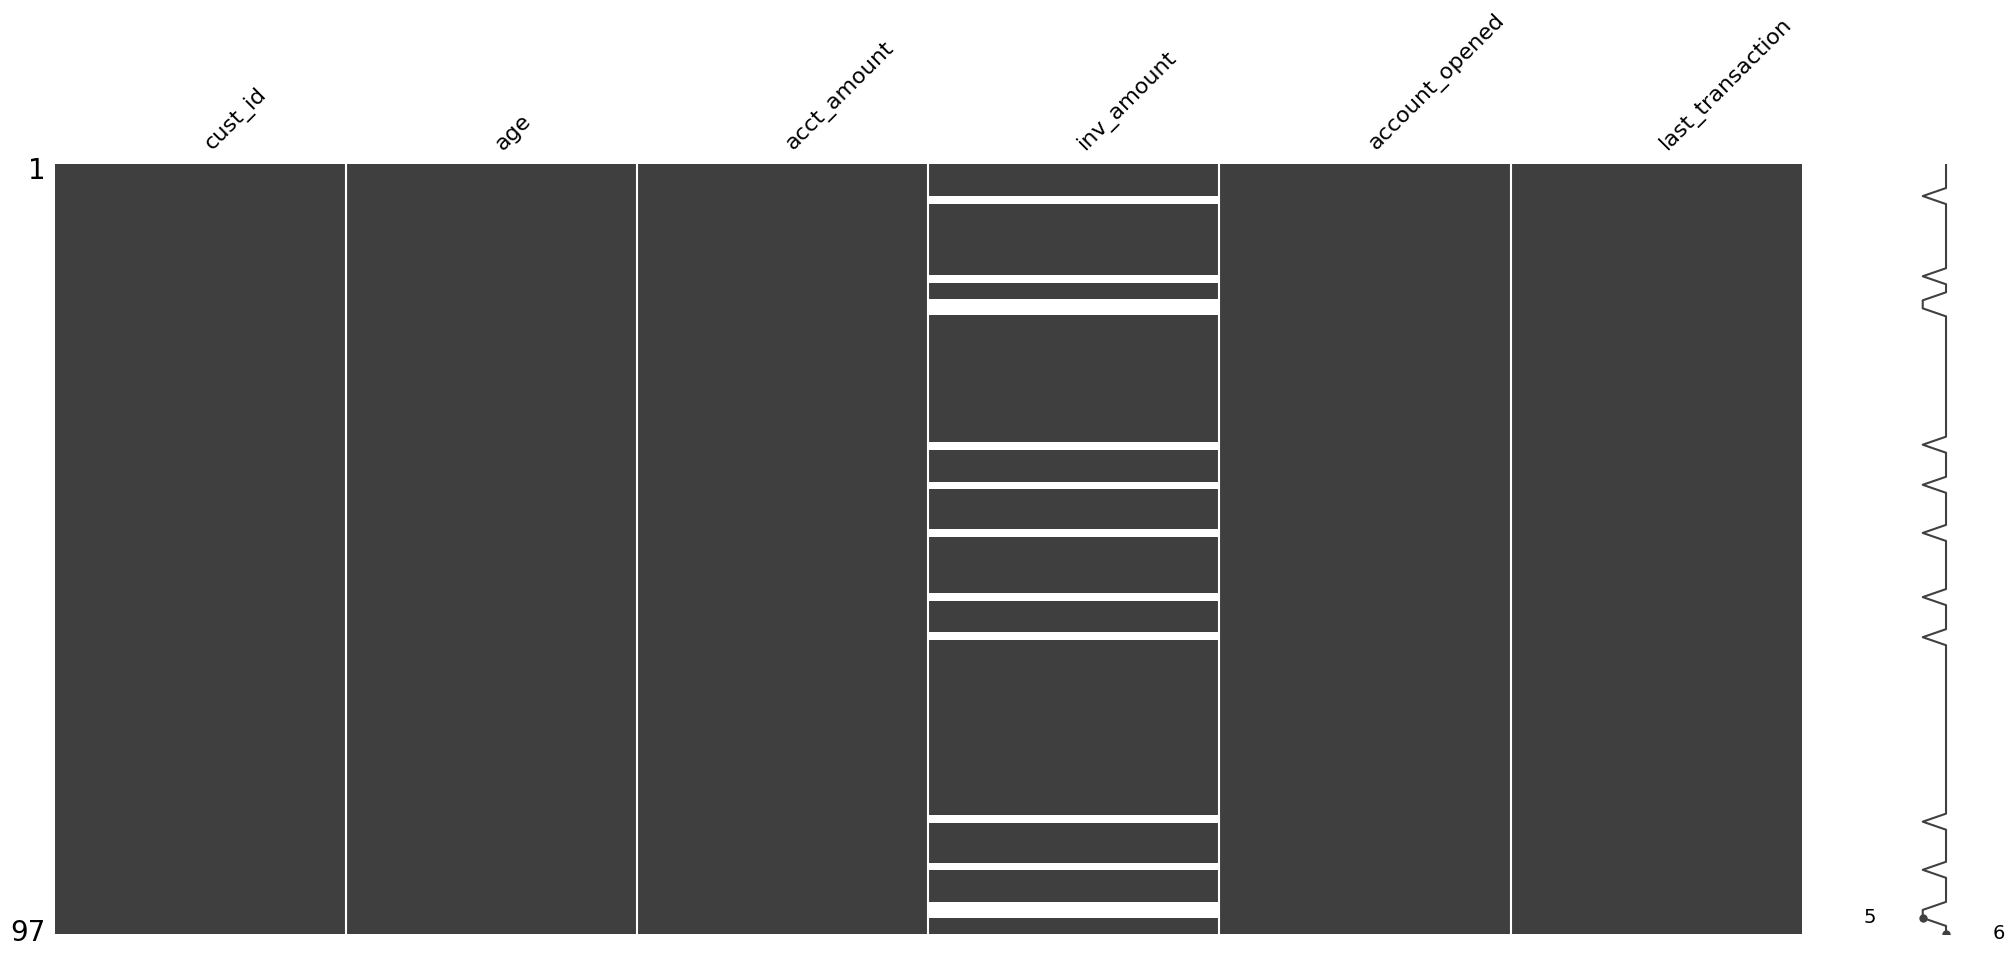

In [ ]:
# Plot and show the missingness matrix of banking with the msno.matrix() function.
import missingno as msno

msno.matrix(banking_mis)
plt.show()

In [ ]:
# Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.
missing_investors = banking_mis[banking_mis["inv_amount"].isna()]
investors = banking_mis[~banking_mis["inv_amount"].isna()]

In [ ]:
print(missing_investors.describe())

             age   acct_amount  inv_amount
count  13.000000     13.000000         0.0
mean   21.846154  73231.238462         NaN
std     1.519109  25553.327176         NaN
min    20.000000  21942.370000         NaN
25%    21.000000  66947.300000         NaN
50%    21.000000  86028.480000         NaN
75%    23.000000  89855.980000         NaN
max    25.000000  99998.350000         NaN


In [ ]:
print(investors.describe())

             age    acct_amount    inv_amount
count  84.000000      84.000000     84.000000
mean   43.559524   75095.273214  44717.885476
std    10.411244   32414.506022  26031.246094
min    26.000000   12209.840000   3216.720000
25%    34.000000   57373.062500  22736.037500
50%    45.000000   83061.845000  44498.460000
75%    53.000000   94165.965000  66176.802500
max    59.000000  250046.760000  93552.690000


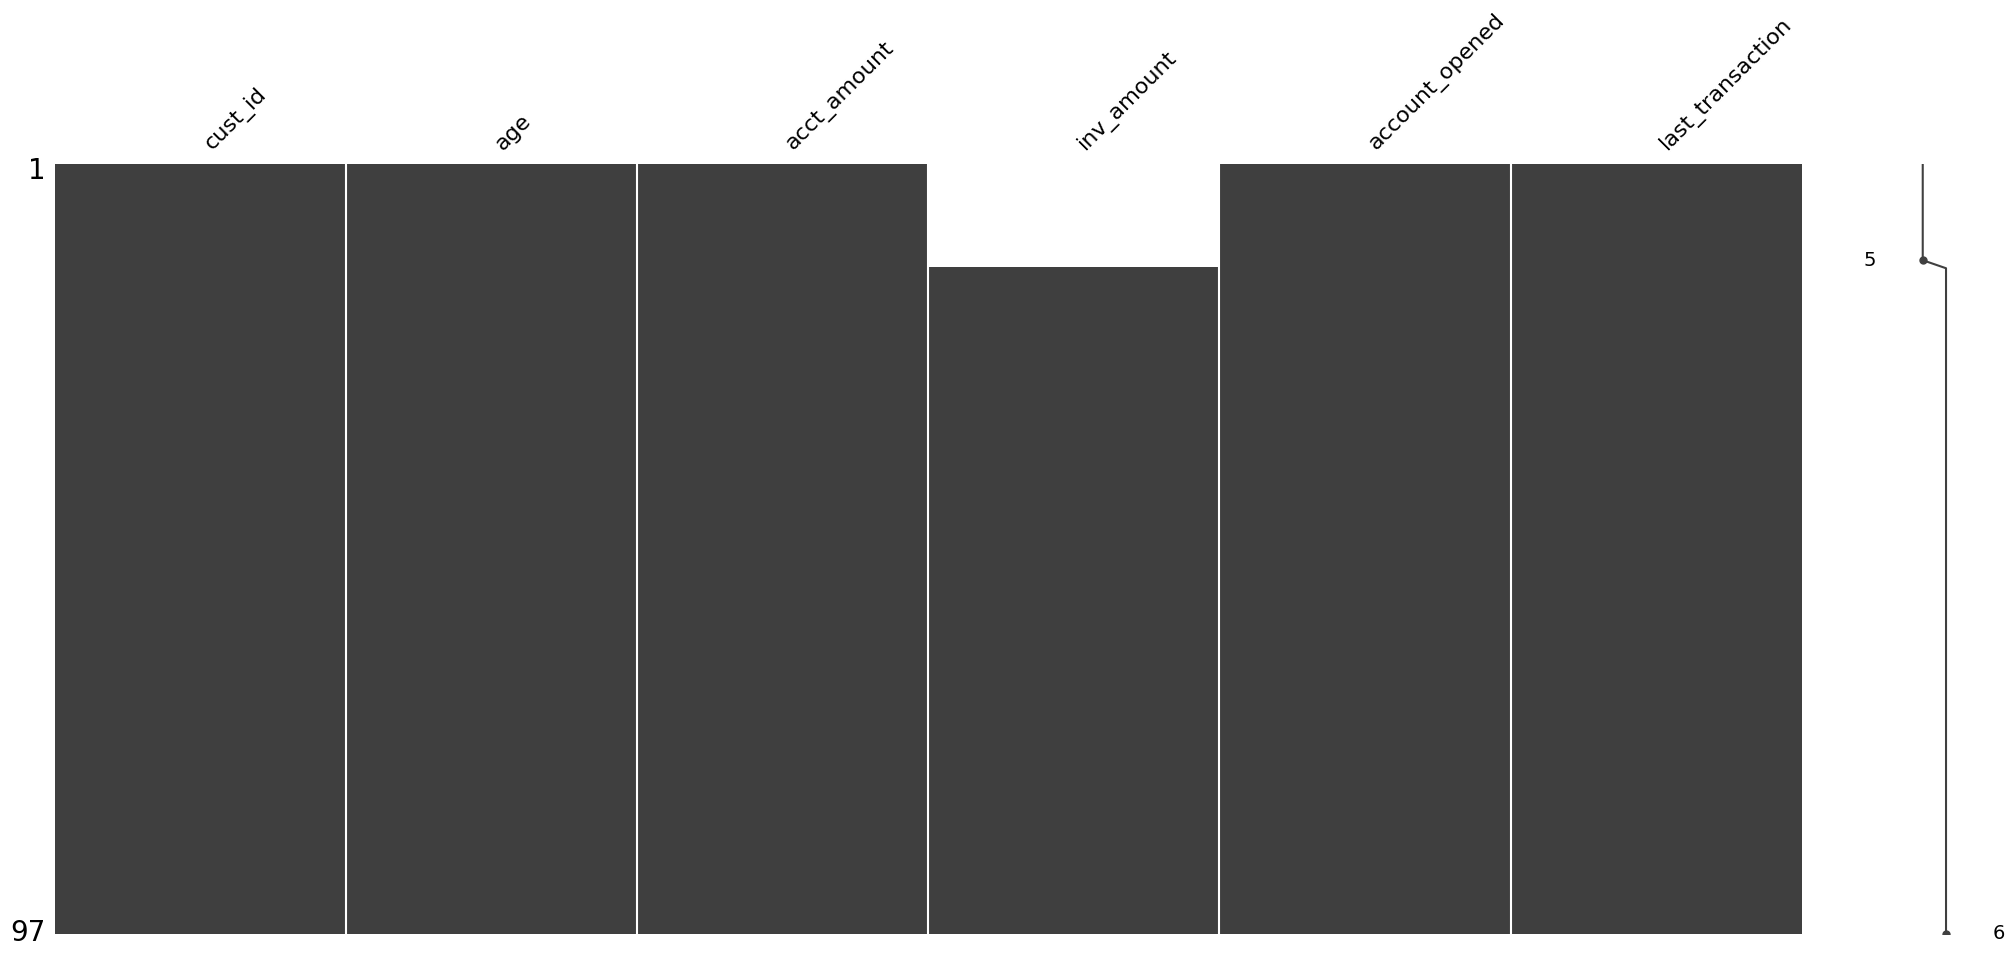

In [ ]:
# Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.
banking_sorted = banking_mis.sort_values(by="age")
msno.matrix(banking_sorted)
plt.show()

### Follow the money
In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of banking with missing `cust_ids`, and impute missing values of `acct_amount` with some domain knowledge.

In [ ]:
banking_missing = pd.read_csv(
    "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/data_manipulation/pandas/cleaning_data/data/banking_missing.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
banking_missing.head()

,cust_id,acct_amount,inv_amount,account_opened,last_transaction
0,8C35540A,44244.71,35500.50,03-05-18,30-09-19
1,D5536652,NaN,81921.86,21-01-18,14-01-19
2,A631984D,NaN,46412.27,26-01-18,06-10-19
3,93F2F951,NaN,76563.35,21-08-17,10-07-19
4,DE0A0882,NaN,18669.01,05-06-17,15-01-19


In [ ]:
# Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
banking_fullid = banking_missing.dropna(subset=["cust_id"])

# Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
acct_imp = banking_fullid["inv_amount"] * 5

# Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().
banking_imputed = banking_fullid.fillna({"acct_amount": acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64


### The cutoff point
In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of restaurants has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the thefuzz's `process.extract()` function by finding the similarity score of the most distant typo of each category.

In [ ]:
from thefuzz import process 

# Store the unique cuisine_types into unique_types.
unique_types = 
